# Aufgabe 2 - Tiefe Einblicke ins Institut

Den Code immer nachvollziehbar kommentieren! Bitte beachtet, dass das Notebook von Anfang bis Ende ohne Fehler durchlaufen muss und dass die requirements.txt Datei aktualisiert wird. 

In [5]:
import os
import random

## Teilaufgabe a): Trainings-und Testdatenset

In [ ]:
# Set random seed for reproducibility
random.seed(123)

# Define the class subdirectories
class_directories = ['Flur', 'Professorenbuero', 'Teekueche', 'Labor']
all_images = []

# Collect all image files with their relative paths from each class directory
for class_dir in class_directories:
    class_path = os.path.join('./Bilder', class_dir)
    
    # Check if the directory exists
    if os.path.exists(class_path):
        for filename in os.listdir(class_path):
            relative_path = os.path.join('./Bilder', class_dir, filename)
            all_images.append(relative_path)
        
        # Print number of images per class
        class_images = os.listdir(class_path)
        print(f"Images in {class_dir}: {len(class_images)}")
    else:
        print(f"Warning: Directory {class_path} does not exist!")

print(f"\nTotal number of images found: {len(all_images)}")

# Shuffle the list to ensure random distribution across classes
random.shuffle(all_images)

# Calculate split index for 80/20 split
split_index = int(0.8 * len(all_images))

# Split into training (80%) and test (20%) sets
training_path_list = all_images[:split_index]
test_path_list = all_images[split_index:]

print(f"\nTraining set size: {len(training_path_list)} images ({len(training_path_list)/len(all_images)*100:.1f}%)")
print(f"Test set size: {len(test_path_list)} images ({len(test_path_list)/len(all_images)*100:.1f}%)")


def count_classes_in_set(image_list, set_name):
    """Analyze class distribution in training and test sets."""
    class_counts = {class_dir: 0 for class_dir in class_directories}
    
    for image_path in image_list:
        for class_dir in class_directories:
            if class_dir in image_path:
                class_counts[class_dir] += 1
                break
    
    print(f"\n{set_name} set class distribution:")
    for class_dir, count in class_counts.items():
        percentage = (count / len(image_list)) * 100 if len(image_list) > 0 else 0
        print(f"  {class_dir}: {count} images ({percentage:.1f}%)")

count_classes_in_set(training_path_list, "Training")
count_classes_in_set(test_path_list, "Test")

Images in Flur: 25
Images in Professorenbuero: 25
Images in Teekueche: 25
Images in Labor: 25

Total number of images found: 100

Training set size: 80 images (80.0%)
Test set size: 20 images (20.0%)

Training set class distribution:
  Flur: 19 images (23.8%)
  Professorenbuero: 20 images (25.0%)
  Teekueche: 22 images (27.5%)
  Labor: 19 images (23.8%)

Test set class distribution:
  Flur: 6 images (30.0%)
  Professorenbuero: 5 images (25.0%)
  Teekueche: 3 images (15.0%)
  Labor: 6 images (30.0%)


## Teilaufgabe b): Verteilung RGB

Extracting RGB values from training images...


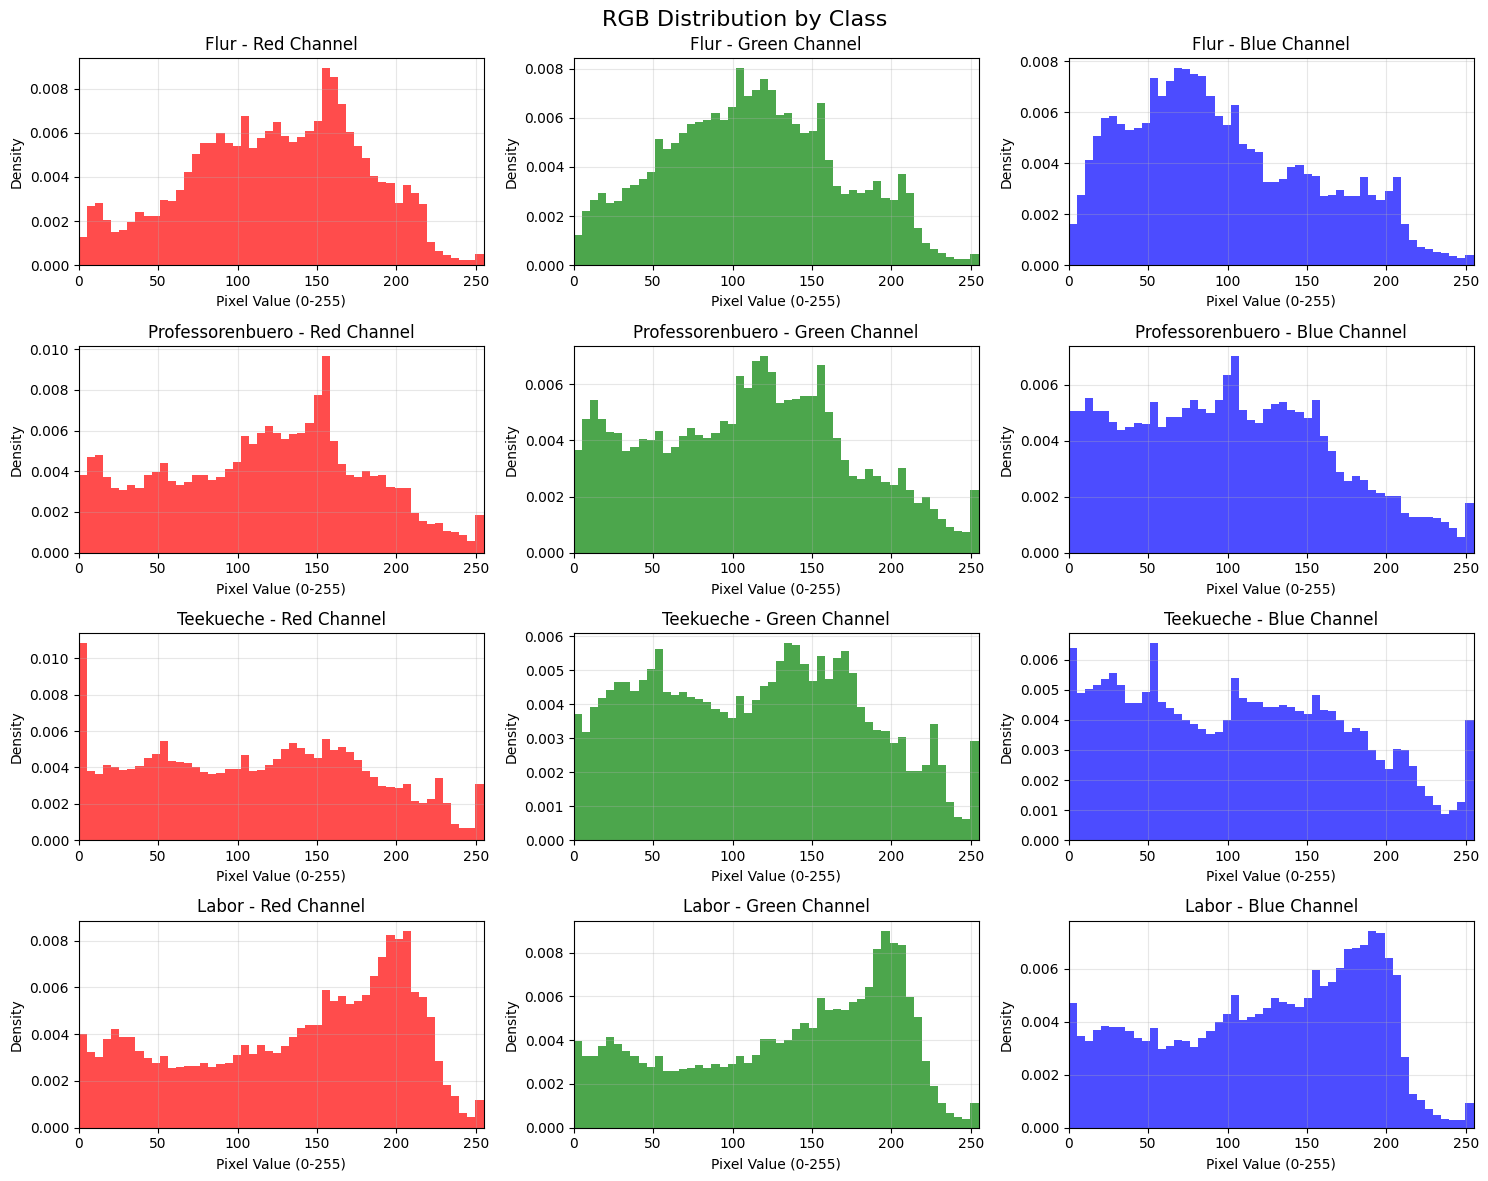

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def extract_rgb_values(image_path):
    """
    Extract RGB values from an image.
    
    Parameters:
    ----------
    image_path : str
        Path to the image file
        
    Returns:
    -------
    tuple
        Tuple containing (r_values, g_values, b_values) as flattened arrays
    """
    try:
        # Load image and convert to RGB
        img = Image.open(image_path).convert('RGB')
        img_array = np.array(img)
        
        # Extract RGB channels and flatten
        r_values = img_array[:, :, 0].flatten()
        g_values = img_array[:, :, 1].flatten()
        b_values = img_array[:, :, 2].flatten()
        
        return r_values, g_values, b_values
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None, None, None

def get_class_from_path(image_path):
    """Extract class name from image path."""
    for class_dir in class_directories:
        if class_dir in image_path:
            return class_dir
    return 'Unknown'

# Collect RGB values for each class
print("Extracting RGB values from training images...")
rgb_data_by_class = {class_dir: {'r': [], 'g': [], 'b': []} for class_dir in class_directories}

for image_path in training_path_list:
    class_name = get_class_from_path(image_path)
    
    r_values, g_values, b_values = extract_rgb_values(image_path)
    
    if r_values is not None:
        rgb_data_by_class[class_name]['r'].extend(r_values)
        rgb_data_by_class[class_name]['g'].extend(g_values)
        rgb_data_by_class[class_name]['b'].extend(b_values)

# Create histograms for each class
fig, axes = plt.subplots(len(class_directories), 3, figsize=(15, 12))
fig.suptitle('RGB Distribution by Class', fontsize=16)

colors = ['red', 'green', 'blue']
channels = ['r', 'g', 'b']
channel_names = ['Red', 'Green', 'Blue']

for i, class_name in enumerate(class_directories):
    for j, (channel, color, channel_name) in enumerate(zip(channels, colors, channel_names)):
        ax = axes[i, j]
        
        # Plot histogram
        rgb_values = rgb_data_by_class[class_name][channel]
        if len(rgb_values) > 0:
            ax.hist(rgb_values, bins=50, color=color, alpha=0.7, density=True)
            ax.set_title(f'{class_name} - {channel_name} Channel')
            ax.set_xlabel('Pixel Value (0-255)')
            ax.set_ylabel('Density')
            ax.grid(True, alpha=0.3)
            ax.set_xlim(0, 255)
        else:
            ax.text(0.5, 0.5, 'No data', ha='center', va='center', transform=ax.transAxes)

plt.tight_layout()
plt.show()

## Teilaufgabe c): Training und Test mit Random Forest 

Extracting features from training images...
Training data shape: (80, 12)
Training labels shape: (80,)
Extracting features from test images...
Test data shape: (20, 12)
Test labels shape: (20,)

Features used: ['R_mean', 'G_mean', 'B_mean', 'R_std', 'G_std', 'B_std', 'R_min', 'G_min', 'B_min', 'R_max', 'G_max', 'B_max']

Training Random Forest Classifier...

=== Random Forest Classification Results ===
Accuracy:  0.2500
F1-Score:  0.2636
Recall:    0.2500
Precision: 0.2817

=== Detailed Classification Report ===
                  precision    recall  f1-score   support

            Flur       0.80      0.67      0.73         6
Professorenbuero       0.17      0.20      0.18         5
       Teekueche       0.00      0.00      0.00         3
           Labor       0.00      0.00      0.00         6

        accuracy                           0.25        20
       macro avg       0.24      0.22      0.23        20
    weighted avg       0.28      0.25      0.26        20



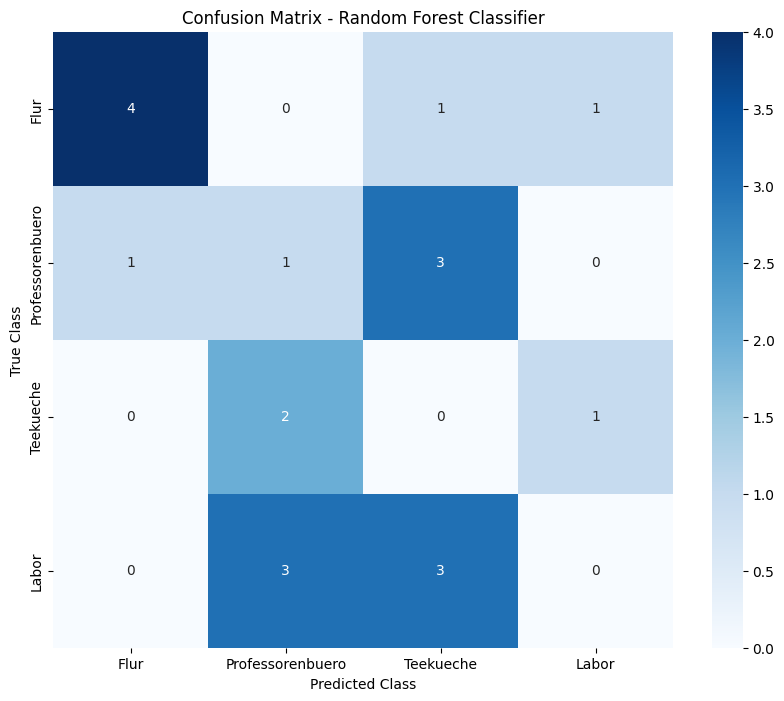


=== Feature Importance ===
G_std: 0.2144
R_std: 0.1978
B_std: 0.1721
G_mean: 0.1277
B_mean: 0.1241
R_mean: 0.1099
B_max: 0.0273
R_max: 0.0153
G_max: 0.0114
R_min: 0.0000
G_min: 0.0000
B_min: 0.0000


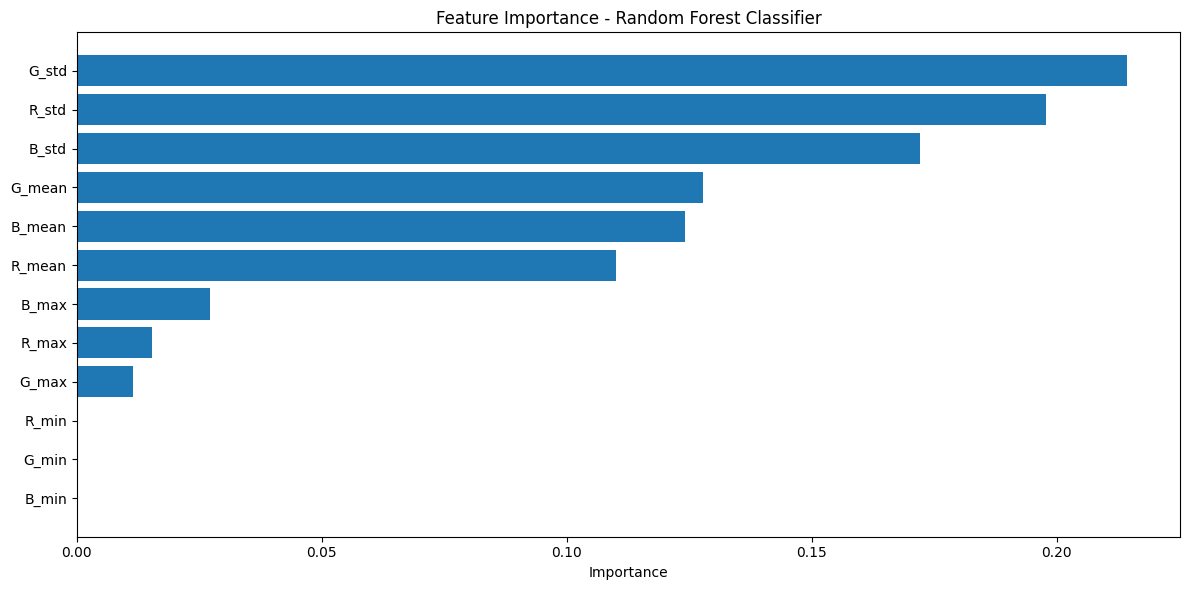


=== Prediction Examples ===
First 10 test predictions:
 1. True: Labor           | Pred: Teekueche       ✗
 2. True: Professorenbuero | Pred: Teekueche       ✗
 3. True: Labor           | Pred: Teekueche       ✗
 4. True: Labor           | Pred: Professorenbuero ✗
 5. True: Labor           | Pred: Professorenbuero ✗
 6. True: Flur            | Pred: Teekueche       ✗
 7. True: Flur            | Pred: Flur            ✓
 8. True: Labor           | Pred: Professorenbuero ✗
 9. True: Professorenbuero | Pred: Teekueche       ✗
10. True: Professorenbuero | Pred: Professorenbuero ✓


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report
import seaborn as sns

def extract_features(image_path):
    """
    Extract features from an image for classification.
    
    Parameters:
    ----------
    image_path : str
        Path to the image file
        
    Returns:
    -------
    list
        List of features: [r_mean, g_mean, b_mean, r_std, g_std, b_std, 
                          r_min, g_min, b_min, r_max, g_max, b_max]
    """
    try:
        # Load image and convert to RGB
        img = Image.open(image_path).convert('RGB')
        img_array = np.array(img)
        
        # Extract RGB channels
        r_channel = img_array[:, :, 0].flatten()
        g_channel = img_array[:, :, 1].flatten()
        b_channel = img_array[:, :, 2].flatten()
        
        # Calculate statistical features for each channel
        features = [
            # Mean values
            np.mean(r_channel), np.mean(g_channel), np.mean(b_channel),
            # Standard deviation
            np.std(r_channel), np.std(g_channel), np.std(b_channel),
            # Minimum values
            np.min(r_channel), np.min(g_channel), np.min(b_channel),
            # Maximum values
            np.max(r_channel), np.max(g_channel), np.max(b_channel)
        ]
        
        return features
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

def get_class_label(image_path):
    """Extract class label from image path."""
    for i, class_dir in enumerate(class_directories):
        if class_dir in image_path:
            return i  # Return numeric label
    return -1  # Unknown class

# Extract features from training data
print("Extracting features from training images...")
X_train = []
y_train = []

for image_path in training_path_list:
    features = extract_features(image_path)
    label = get_class_label(image_path)
    
    if features is not None and label != -1:
        X_train.append(features)
        y_train.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)

print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")

# Extract features from test data
print("Extracting features from test images...")
X_test = []
y_test = []

for image_path in test_path_list:
    features = extract_features(image_path)
    label = get_class_label(image_path)
    
    if features is not None and label != -1:
        X_test.append(features)
        y_test.append(label)

X_test = np.array(X_test)
y_test = np.array(y_test)

print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")

# Feature names for reference
feature_names = [
    'R_mean', 'G_mean', 'B_mean',
    'R_std', 'G_std', 'B_std', 
    'R_min', 'G_min', 'B_min',
    'R_max', 'G_max', 'B_max'
]

print(f"\nFeatures used: {feature_names}")

# Train Random Forest Classifier
print("\nTraining Random Forest Classifier...")
rf_classifier = RandomForestClassifier(
    n_estimators=1000,  # Number of trees
    random_state=123,   # For reproducibility
    max_depth=10,      # Prevent overfitting
    min_samples_split=5,
    min_samples_leaf=2
)

# Fit the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

# Print results
print(f"\n=== Random Forest Classification Results ---")
print(f"Accuracy:  {accuracy:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"Precision: {precision:.4f}")

# Detailed classification report
print(f"\n--- Detailed Classification Report ---")
print(classification_report(y_test, y_pred, target_names=class_directories))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_directories, 
            yticklabels=class_directories)
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# Feature importance
feature_importance = rf_classifier.feature_importances_
importance_df = list(zip(feature_names, feature_importance))
importance_df.sort(key=lambda x: x[1], reverse=True)

print(f"\n--- Feature Importance ---")
for feature, importance in importance_df:
    print(f"{feature}: {importance:.4f}")

# Plot feature importance
plt.figure(figsize=(12, 6))
features, importances = zip(*importance_df)
plt.barh(range(len(features)), importances)
plt.yticks(range(len(features)), features)
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest Classifier')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Display some prediction examples
print(f"\n--- Prediction Examples ---")
print("First 10 test predictions:")
for i in range(min(10, len(y_test))):
    true_class = class_directories[y_test[i]]
    pred_class = class_directories[y_pred[i]]
    correct = "✓" if y_test[i] == y_pred[i] else "✗"
    print(f"{i+1:2d}. True: {true_class:15} | Pred: {pred_class:15} {correct}")

## Teilaufgabe d): Hyperparameteroptimierung

=== Hyperparameter Optimization ===
Optimizing n_estimators with 5-fold cross-validation...
Testing values: [50, 100, 200]
Fitting 5 folds for each of 3 candidates, totalling 15 fits

Hyperparameter optimization completed in 3.59 seconds

=== Optimization Results ===
Best parameter: {'n_estimators': 100}
Best cross-validation accuracy: 0.6500

=== Cross-Validation Results for all tested values ===
n_estimators=50: 0.6375 (+/- 0.2669)
n_estimators=100: 0.6500 (+/- 0.2574)
n_estimators=200: 0.6500 (+/- 0.2574)

=== Training Optimized Random Forest ===
Using best parameter: n_estimators = 100

=== Optimized Random Forest Results ===
Training time: 0.0468 seconds
Prediction time: 0.0015 seconds
Accuracy:  0.2500
F1-Score:  0.2636
Recall:    0.2500
Precision: 0.2817

=== Comparison with Baseline Model ===
Baseline Accuracy:  0.2500
Optimized Accuracy: 0.2500
Improvement: 0.0000

=== Detailed Classification Report (Optimized Model) ===
                  precision    recall  f1-score   suppor

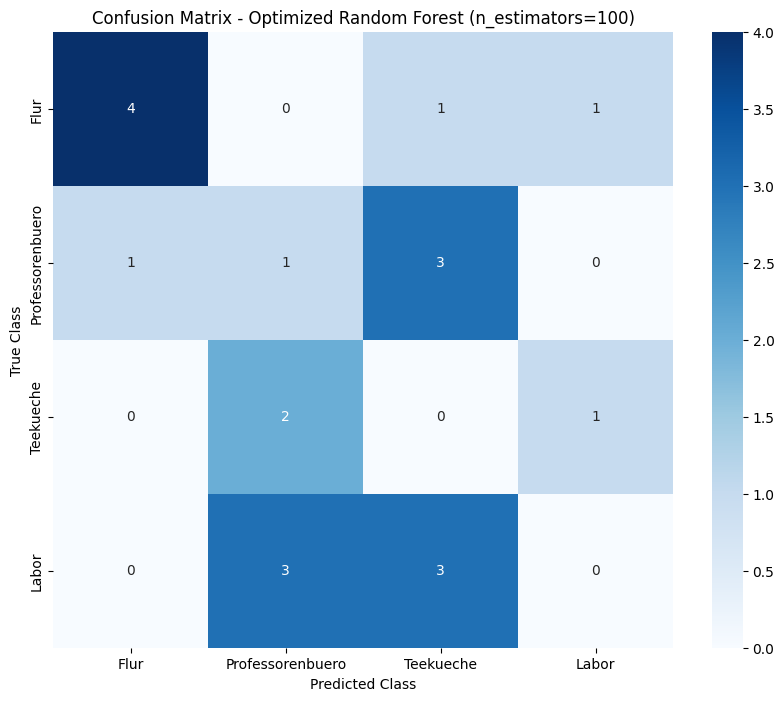


=== Feature Importance (Optimized Model) ===
G_std: 0.2115
R_std: 0.2100
B_std: 0.1620
G_mean: 0.1502
B_mean: 0.1088
R_mean: 0.1079
B_max: 0.0227
R_max: 0.0138
G_max: 0.0131
R_min: 0.0000
G_min: 0.0000
B_min: 0.0000


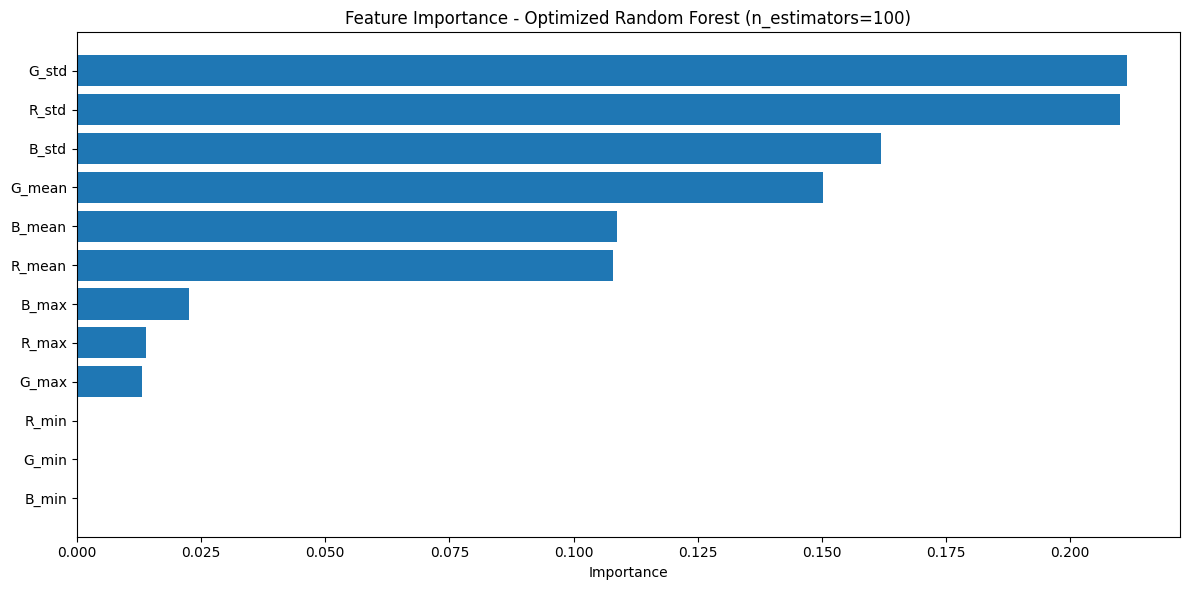


=== Final Cross-Validation Analysis ===
5-fold CV scores: [0.6875 0.625  0.5625 0.875  0.5   ]
Mean CV accuracy: 0.6500 (+/- 0.2574)

=== Prediction Examples (Optimized Model) ===
First 10 test predictions:
 1. True: Labor           | Pred: Teekueche       ✗
 2. True: Professorenbuero | Pred: Teekueche       ✗
 3. True: Labor           | Pred: Teekueche       ✗
 4. True: Labor           | Pred: Professorenbuero ✗
 5. True: Labor           | Pred: Professorenbuero ✗
 6. True: Flur            | Pred: Teekueche       ✗
 7. True: Flur            | Pred: Flur            ✓
 8. True: Labor           | Pred: Professorenbuero ✗
 9. True: Professorenbuero | Pred: Teekueche       ✗
10. True: Professorenbuero | Pred: Professorenbuero ✓


In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
import time

# Define hyperparameter grid with only one parameter and 3 values to keep computation manageable
# We'll optimize n_estimators as it's one of the most important hyperparameters for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200]  # Number of trees in the forest
}

print("--- Hyperparameter Optimization ---")
print("Optimizing n_estimators with 5-fold cross-validation...")
print("Testing values: [50, 100, 200]")

# Create Random Forest classifier with fixed other parameters
rf_base = RandomForestClassifier(
    random_state=123,   # For reproducibility
    max_depth=10,       # Fixed
    min_samples_split=5, # Fixed
    min_samples_leaf=2,  # Fixed
    n_jobs=-1           # Use all available cores
)

# Setup GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation as requested
    scoring='accuracy',
    n_jobs=-1,          # Use all available cores
    verbose=1           # Show progress
)

# Measure training time
start_time = time.time()

# Fit the grid search
grid_search.fit(X_train, y_train)

training_time = time.time() - start_time

print(f"\nHyperparameter optimization completed in {training_time:.2f} seconds")

# Get best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"\n--- Optimization Results ---")
print(f"Best parameter: {best_params}")
print(f"Best cross-validation accuracy: {best_score:.4f}")

# Display all CV results
print(f"\n--- Cross-Validation Results for all tested values ---")
results = grid_search.cv_results_
for i, n_est in enumerate(param_grid['n_estimators']):
    mean_score = results['mean_test_score'][i]
    std_score = results['std_test_score'][i]
    print(f"n_estimators={n_est}: {mean_score:.4f} (+/- {std_score * 2:.4f})")

# Train final optimized model
print(f"\n--- Training Optimized Random Forest ---")
print(f"Using best parameter: n_estimators = {best_params['n_estimators']}")

optimized_rf = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    random_state=123,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2
)

# Fit the optimized model
start_time = time.time()
optimized_rf.fit(X_train, y_train)
fit_time = time.time() - start_time

# Make predictions on test set
start_time = time.time()
y_pred_optimized = optimized_rf.predict(X_test)
prediction_time = time.time() - start_time

# Calculate metrics for optimized model
accuracy_opt = accuracy_score(y_test, y_pred_optimized)
f1_opt = f1_score(y_test, y_pred_optimized, average='weighted')
recall_opt = recall_score(y_test, y_pred_optimized, average='weighted')
precision_opt = precision_score(y_test, y_pred_optimized, average='weighted')

print(f"\n--- Optimized Random Forest Results ---")
print(f"Training time: {fit_time:.4f} seconds")
print(f"Prediction time: {prediction_time:.4f} seconds")
print(f"Accuracy:  {accuracy_opt:.4f}")
print(f"F1-Score:  {f1_opt:.4f}")
print(f"Recall:    {recall_opt:.4f}")
print(f"Precision: {precision_opt:.4f}")

# Compare with baseline model from previous task
print(f"\n--- Comparison with Baseline Model ---")
print(f"Baseline Accuracy:  {accuracy:.4f}")
print(f"Optimized Accuracy: {accuracy_opt:.4f}")
print(f"Improvement: {accuracy_opt - accuracy:.4f}")

# Detailed classification report for optimized model
print(f"\n--- Detailed Classification Report (Optimized Model) ---")
print(classification_report(y_test, y_pred_optimized, target_names=class_directories))

# Create confusion matrix for optimized model
cm_opt = confusion_matrix(y_test, y_pred_optimized)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_opt, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_directories, 
            yticklabels=class_directories)
plt.title(f'Confusion Matrix - Optimized Random Forest (n_estimators={best_params["n_estimators"]})')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# Feature importance for optimized model
feature_importance_opt = optimized_rf.feature_importances_
importance_df_opt = list(zip(feature_names, feature_importance_opt))
importance_df_opt.sort(key=lambda x: x[1], reverse=True)

print(f"\n--- Feature Importance (Optimized Model) ---")
for feature, importance in importance_df_opt:
    print(f"{feature}: {importance:.4f}")

# Plot feature importance
plt.figure(figsize=(12, 6))
features_opt, importances_opt = zip(*importance_df_opt)
plt.barh(range(len(features_opt)), importances_opt)
plt.yticks(range(len(features_opt)), features_opt)
plt.xlabel('Importance')
plt.title(f'Feature Importance - Optimized Random Forest (n_estimators={best_params["n_estimators"]})')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Additional cross-validation analysis on the optimized model
print(f"\n--- Final Cross-Validation Analysis ---")
cv_scores = cross_val_score(optimized_rf, X_train, y_train, cv=5, scoring='accuracy')
print(f"5-fold CV scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Display prediction examples
print(f"\n--- Prediction Examples (Optimized Model) ---")
print("First 10 test predictions:")
for i in range(min(10, len(y_test))):
    true_class = class_directories[y_test[i]]
    pred_class = class_directories[y_pred_optimized[i]]
    correct = "✓" if y_test[i] == y_pred_optimized[i] else "✗"
    print(f"{i+1:2d}. True: {true_class:15} | Pred: {pred_class:15} {correct}")

## Teilaufgabe e): Dimensionalitätsreduktion